In [41]:
"""
================================================================================
MACHINE LEARNING - ASSIGNMENT 2: Machine Learning Classification models and
Evaluation metrics with deployment
================================================================================
"""

'\n================================================================================\nMACHINE LEARNING - ASSIGNMENT 2: Machine Learning Classification models and\nEvaluation metrics with deployment\n================================================================================\n'

In [42]:
"""
================================================================================
STUDENT INFORMATION
================================================================================

BITS ID: 2025AB05008
Name: HARISH KUMAR K
Email: 2025ab05008@wilp.bits-pilani.ac.in
Date: 15.02.2026

================================================================================
"""

'\n================================================================================\nSTUDENT INFORMATION\n================================================================================\n\nBITS ID: 2025AB05008\nName: HARISH KUMAR K\nEmail: 2025ab05008@wilp.bits-pilani.ac.in\nDate: 15.02.2026\n\n================================================================================\n'

In [43]:
!pip install ucimlrepo

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import ( accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, classification_report )
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [45]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data"
df = pd.read_csv(url, header=None)

df.columns = [
    "top-left", "top-middle", "top-right",
    "middle-left", "middle-middle", "middle-right",
    "bottom-left", "bottom-middle", "bottom-right",
    "Class"
]

print("Dataset shape:", df.shape)
print(df.head())


Dataset shape: (958, 10)
  top-left top-middle top-right middle-left middle-middle middle-right  \
0        x          x         x           x             o            o   
1        x          x         x           x             o            o   
2        x          x         x           x             o            o   
3        x          x         x           x             o            o   
4        x          x         x           x             o            o   

  bottom-left bottom-middle bottom-right     Class  
0           x             o            o  positive  
1           o             x            o  positive  
2           o             o            x  positive  
3           o             b            b  positive  
4           b             o            b  positive  


In [46]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [47]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y )

In [49]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
# Define Models
models = { "Logistic Regression": LogisticRegression(max_iter=1000),
          "Decision Tree": DecisionTreeClassifier(random_state=42),
           "kNN": KNeighborsClassifier(n_neighbors=5),
           "Naive Bayes": GaussianNB(),
           "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
           "XGBoost": XGBClassifier(eval_metric="logloss") }


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.57      0.25      0.35        67
           1       0.69      0.90      0.78       125

    accuracy                           0.67       192
   macro avg       0.63      0.57      0.57       192
weighted avg       0.65      0.67      0.63       192



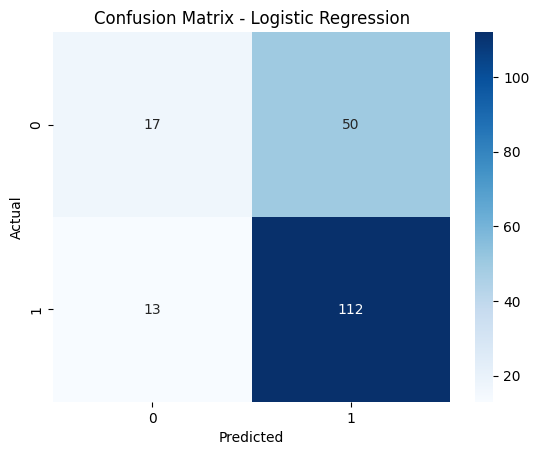


Comparison Table:

                 Model  Accuracy       AUC  Precision    Recall        F1  \
0  Logistic Regression  0.671875  0.604418   0.647846  0.671875  0.630445   

        MCC  
0  0.196556  

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        67
           1       0.89      0.94      0.91       125

    accuracy                           0.89       192
   macro avg       0.88      0.86      0.87       192
weighted avg       0.88      0.89      0.88       192



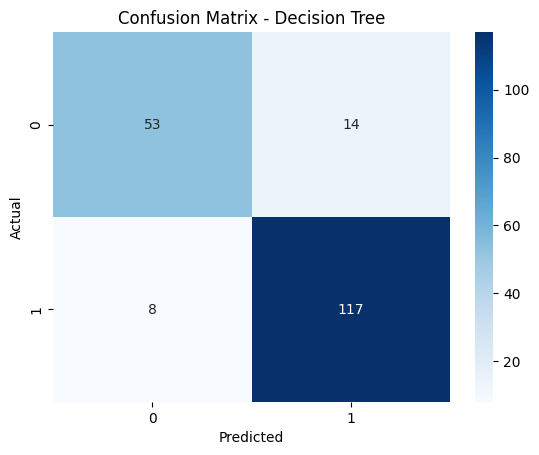


Comparison Table:

                 Model  Accuracy       AUC  Precision    Recall        F1  \
0  Logistic Regression  0.671875  0.604418   0.647846  0.671875  0.630445   
1        Decision Tree  0.885417  0.863522   0.884658  0.885417  0.884074   

        MCC  
0  0.196556  
1  0.744309  

kNN Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.69      0.81        67
           1       0.86      0.99      0.92       125

    accuracy                           0.89       192
   macro avg       0.92      0.84      0.86       192
weighted avg       0.90      0.89      0.88       192



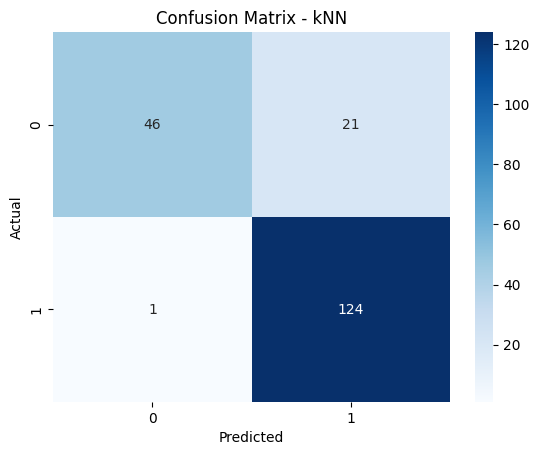


Comparison Table:

                 Model  Accuracy       AUC  Precision    Recall        F1  \
0  Logistic Regression  0.671875  0.604418   0.647846  0.671875  0.630445   
1        Decision Tree  0.885417  0.863522   0.884658  0.885417  0.884074   
2                  kNN  0.885417  0.894328   0.898287  0.885417  0.879609   

        MCC  
0  0.196556  
1  0.744309  
2  0.752233  

Naive Bayes Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.18      0.30        67
           1       0.69      0.99      0.82       125

    accuracy                           0.71       192
   macro avg       0.81      0.59      0.56       192
weighted avg       0.77      0.71      0.64       192



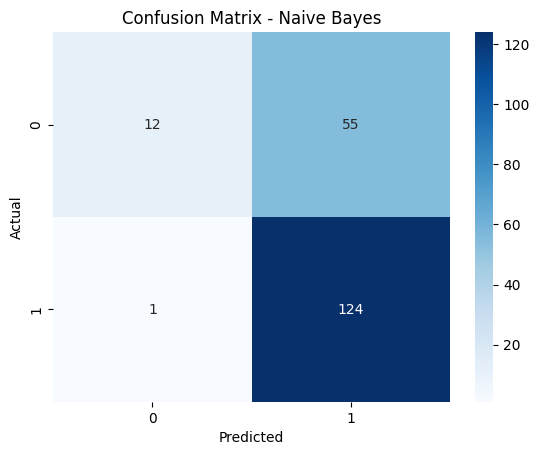


Comparison Table:

                 Model  Accuracy       AUC  Precision    Recall        F1  \
0  Logistic Regression  0.671875  0.604418   0.647846  0.671875  0.630445   
1        Decision Tree  0.885417  0.863522   0.884658  0.885417  0.884074   
2                  kNN  0.885417  0.894328   0.898287  0.885417  0.879609   
3          Naive Bayes  0.708333  0.703761   0.773116  0.708333  0.635800   

        MCC  
0  0.196556  
1  0.744309  
2  0.752233  
3  0.324605  

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        67
           1       0.93      1.00      0.97       125

    accuracy                           0.95       192
   macro avg       0.97      0.93      0.95       192
weighted avg       0.96      0.95      0.95       192



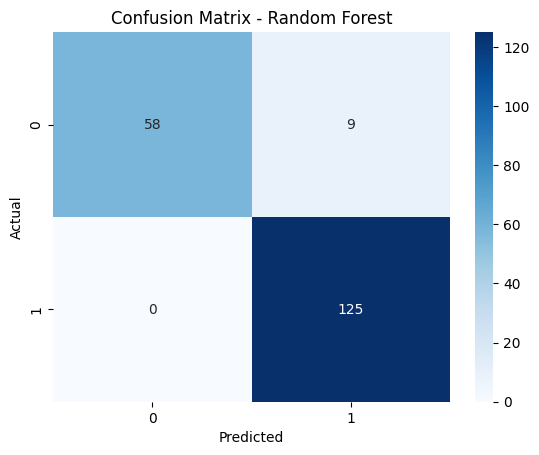


Comparison Table:

                 Model  Accuracy       AUC  Precision    Recall        F1  \
0  Logistic Regression  0.671875  0.604418   0.647846  0.671875  0.630445   
1        Decision Tree  0.885417  0.863522   0.884658  0.885417  0.884074   
2                  kNN  0.885417  0.894328   0.898287  0.885417  0.879609   
3          Naive Bayes  0.708333  0.703761   0.773116  0.708333  0.635800   
4        Random Forest  0.953125  0.995522   0.956273  0.953125  0.952252   

        MCC  
0  0.196556  
1  0.744309  
2  0.752233  
3  0.324605  
4  0.898626  

XGBoost Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        67
           1       0.98      1.00      0.99       125

    accuracy                           0.98       192
   macro avg       0.99      0.98      0.98       192
weighted avg       0.98      0.98      0.98       192



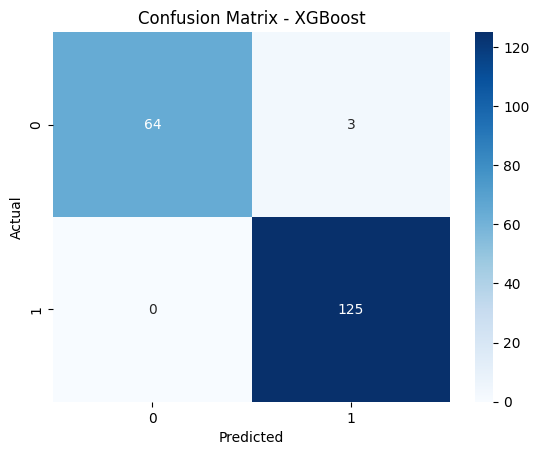


Comparison Table:

                 Model  Accuracy       AUC  Precision    Recall        F1  \
0  Logistic Regression  0.671875  0.604418   0.647846  0.671875  0.630445   
1        Decision Tree  0.885417  0.863522   0.884658  0.885417  0.884074   
2                  kNN  0.885417  0.894328   0.898287  0.885417  0.879609   
3          Naive Bayes  0.708333  0.703761   0.773116  0.708333  0.635800   
4        Random Forest  0.953125  0.995522   0.956273  0.953125  0.952252   
5              XGBoost  0.984375  0.999881   0.984741  0.984375  0.984289   

        MCC  
0  0.196556  
1  0.744309  
2  0.752233  
3  0.324605  
4  0.898626  
5  0.965834  


In [52]:
# Train & Evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #joblib.dump(model, f"model/{name.replace(' ', '_')}.pkl")

    # For AUC, need probability scores
    if hasattr(model, "predict_proba"):
        if len(np.unique(y)) == 2: # binary classification
            y_prob = model.predict_proba(X_test)[:,1]
        else: # multi-class
            y_prob = None
    else:
        y_prob = None

    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A",
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1": f1_score(y_test, y_pred, average="weighted"),
        "MCC": matthews_corrcoef(y_test, y_pred)
    }
    results.append(metrics)

    # Print classification report
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

    # Confusion matrix plot
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Results Table

    results_df = pd.DataFrame(results)
    print("\nComparison Table:\n")
    print(results_df)

    # Save results for README.md
    results_df.to_csv("model_results.csv", index=False)